In [198]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [199]:
# class  - 2->benign
#4-> Maglignant
df = pd.read_csv("breastCancer.csv")

In [200]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Exploratory Data Analysis

In [201]:
df["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [202]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [203]:
pd.reset_option('display.max_rows', None)

In [204]:
df["bare_nucleoli"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [205]:
df["bare_nucleoli"] = df["bare_nucleoli"].replace("?",np.nan)

In [206]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [207]:
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [208]:
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [209]:
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [216]:
df[df["bare_nucleoli"].isnull() == True] = df[df["bare_nucleoli"].isnull() == True].fillna(df.median())

In [220]:
df["bare_nucleoli"] = df["bare_nucleoli"].astype("int64")

In [221]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [222]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [224]:
df = df.drop("id",axis=1)

In [225]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [227]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


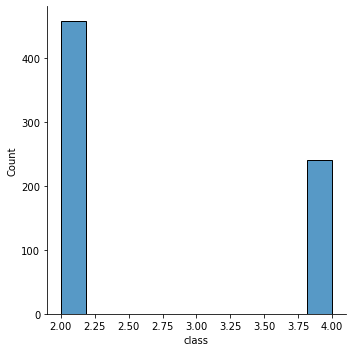

In [235]:
sns.displot(df["class"])

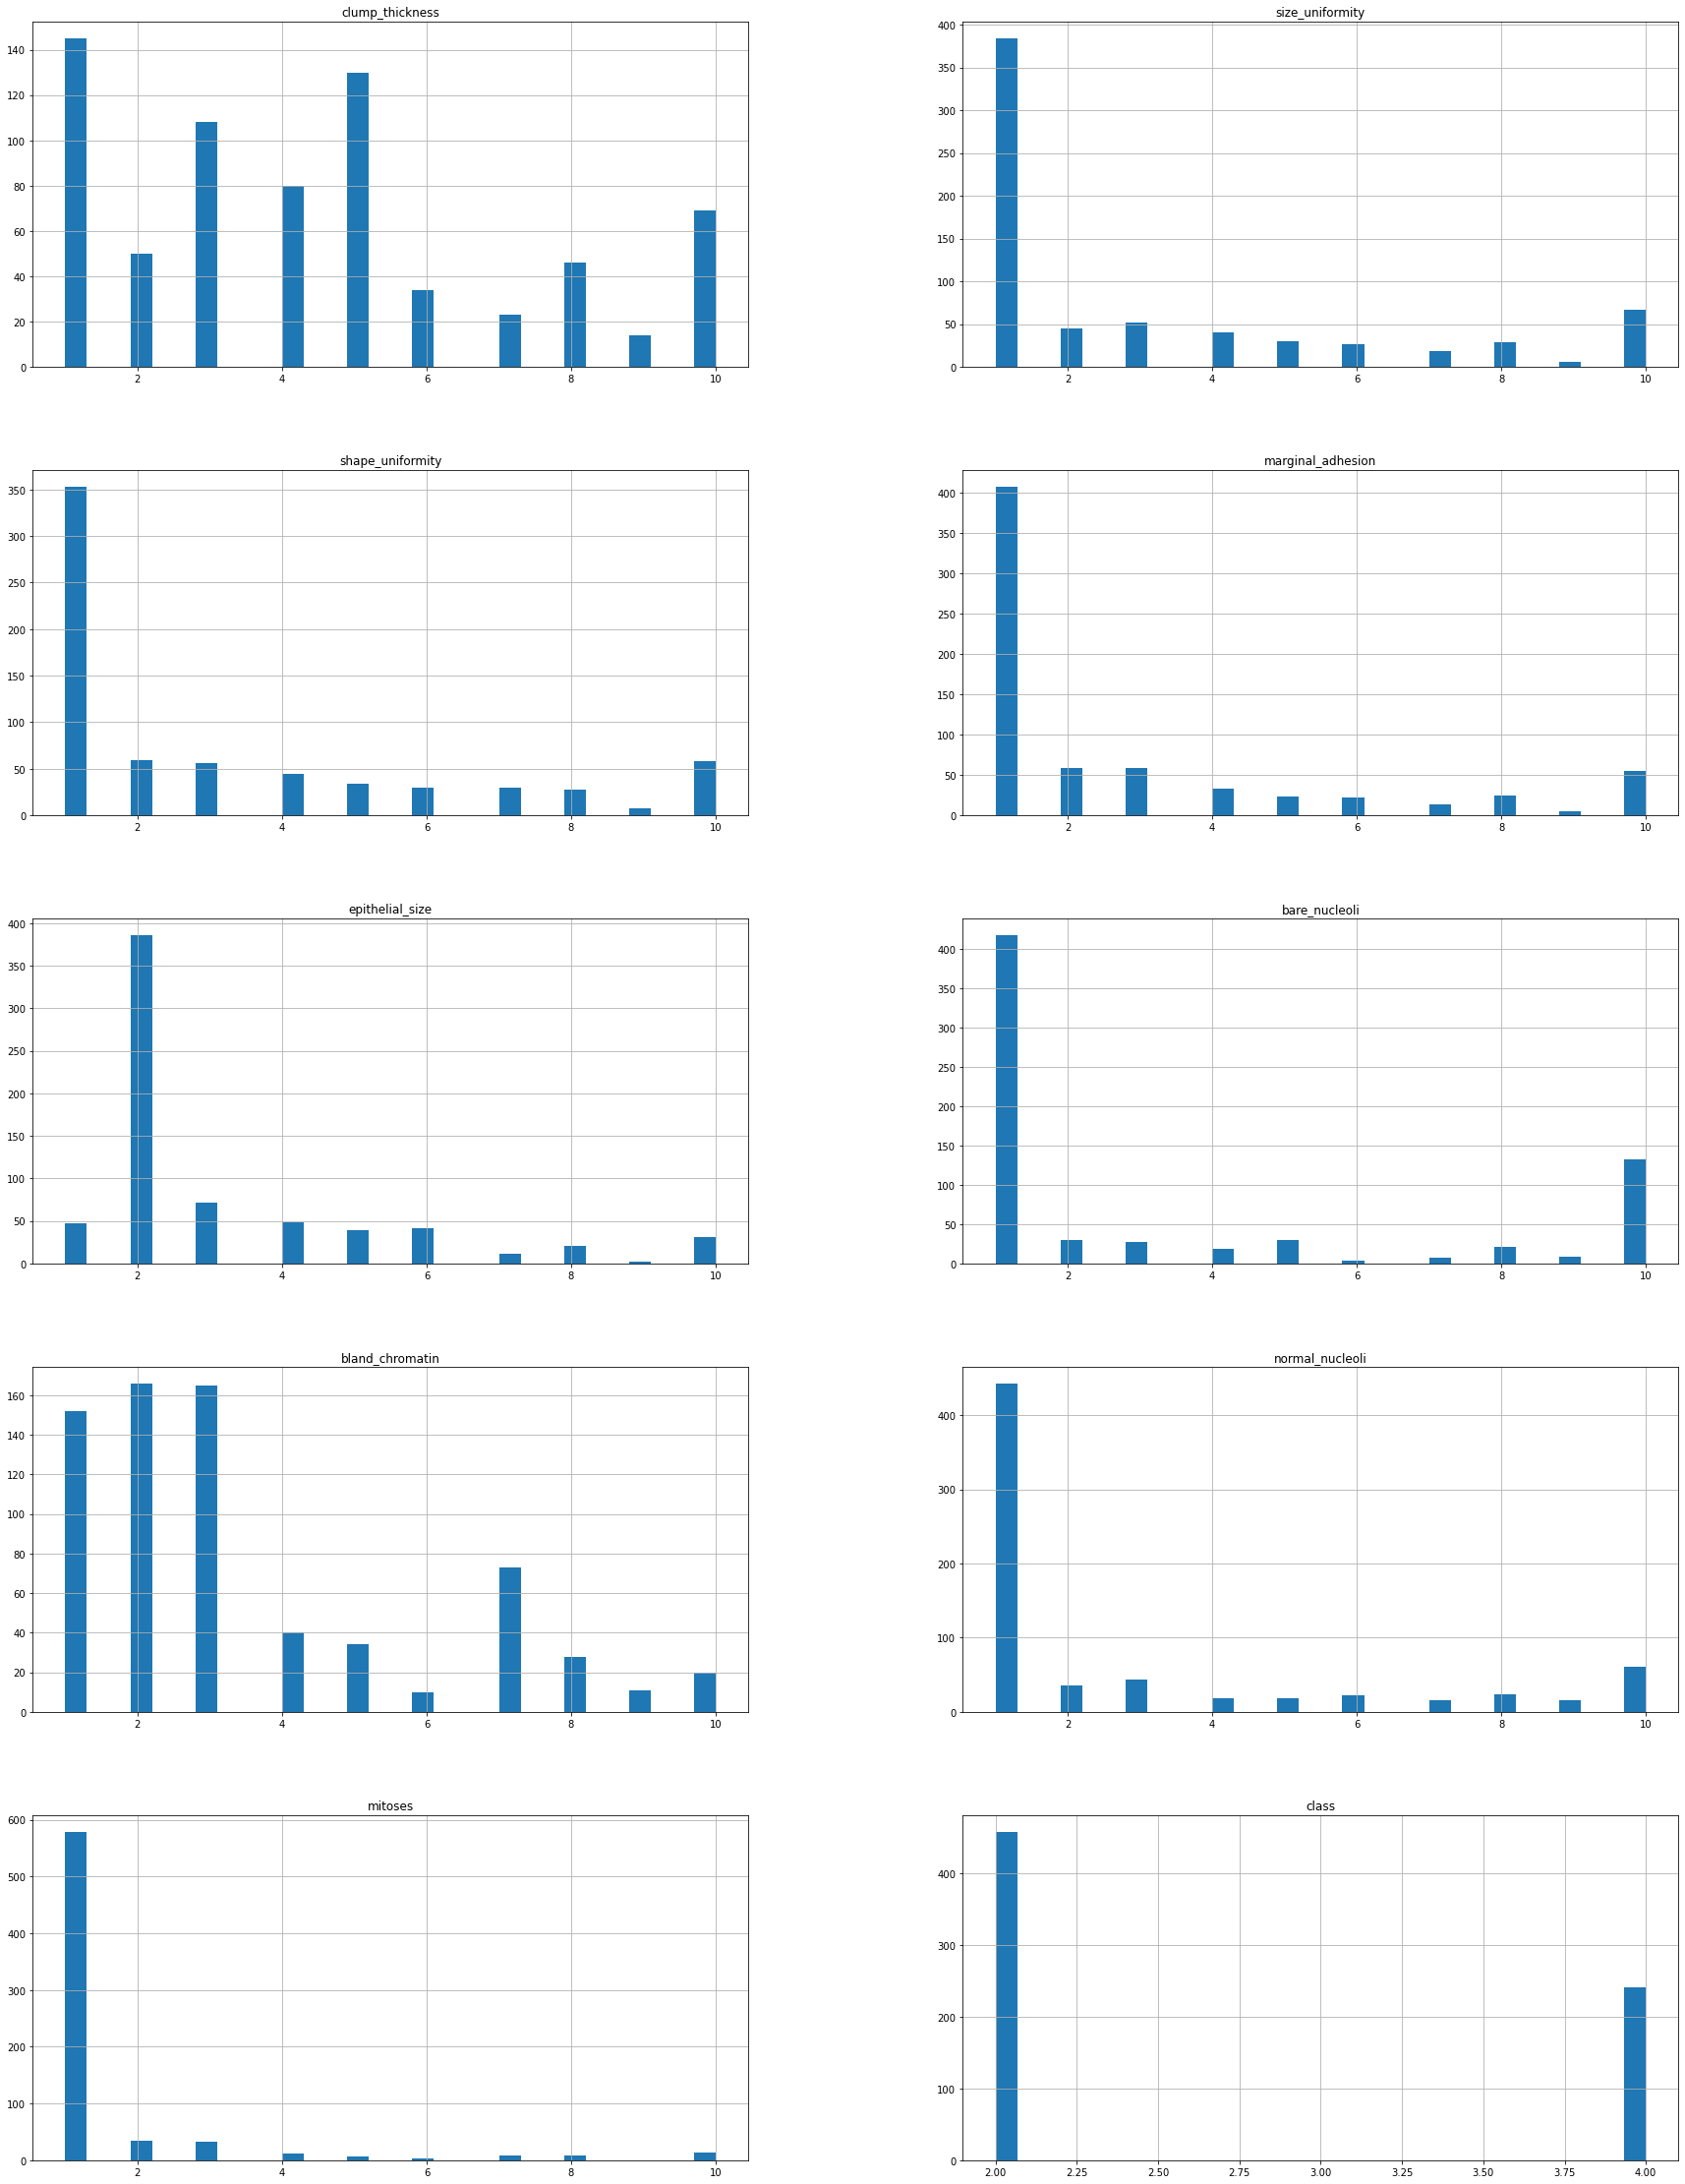

In [259]:
df.hist(figsize=(30,40),layout=(5,2),bins=30 );

<AxesSubplot:>

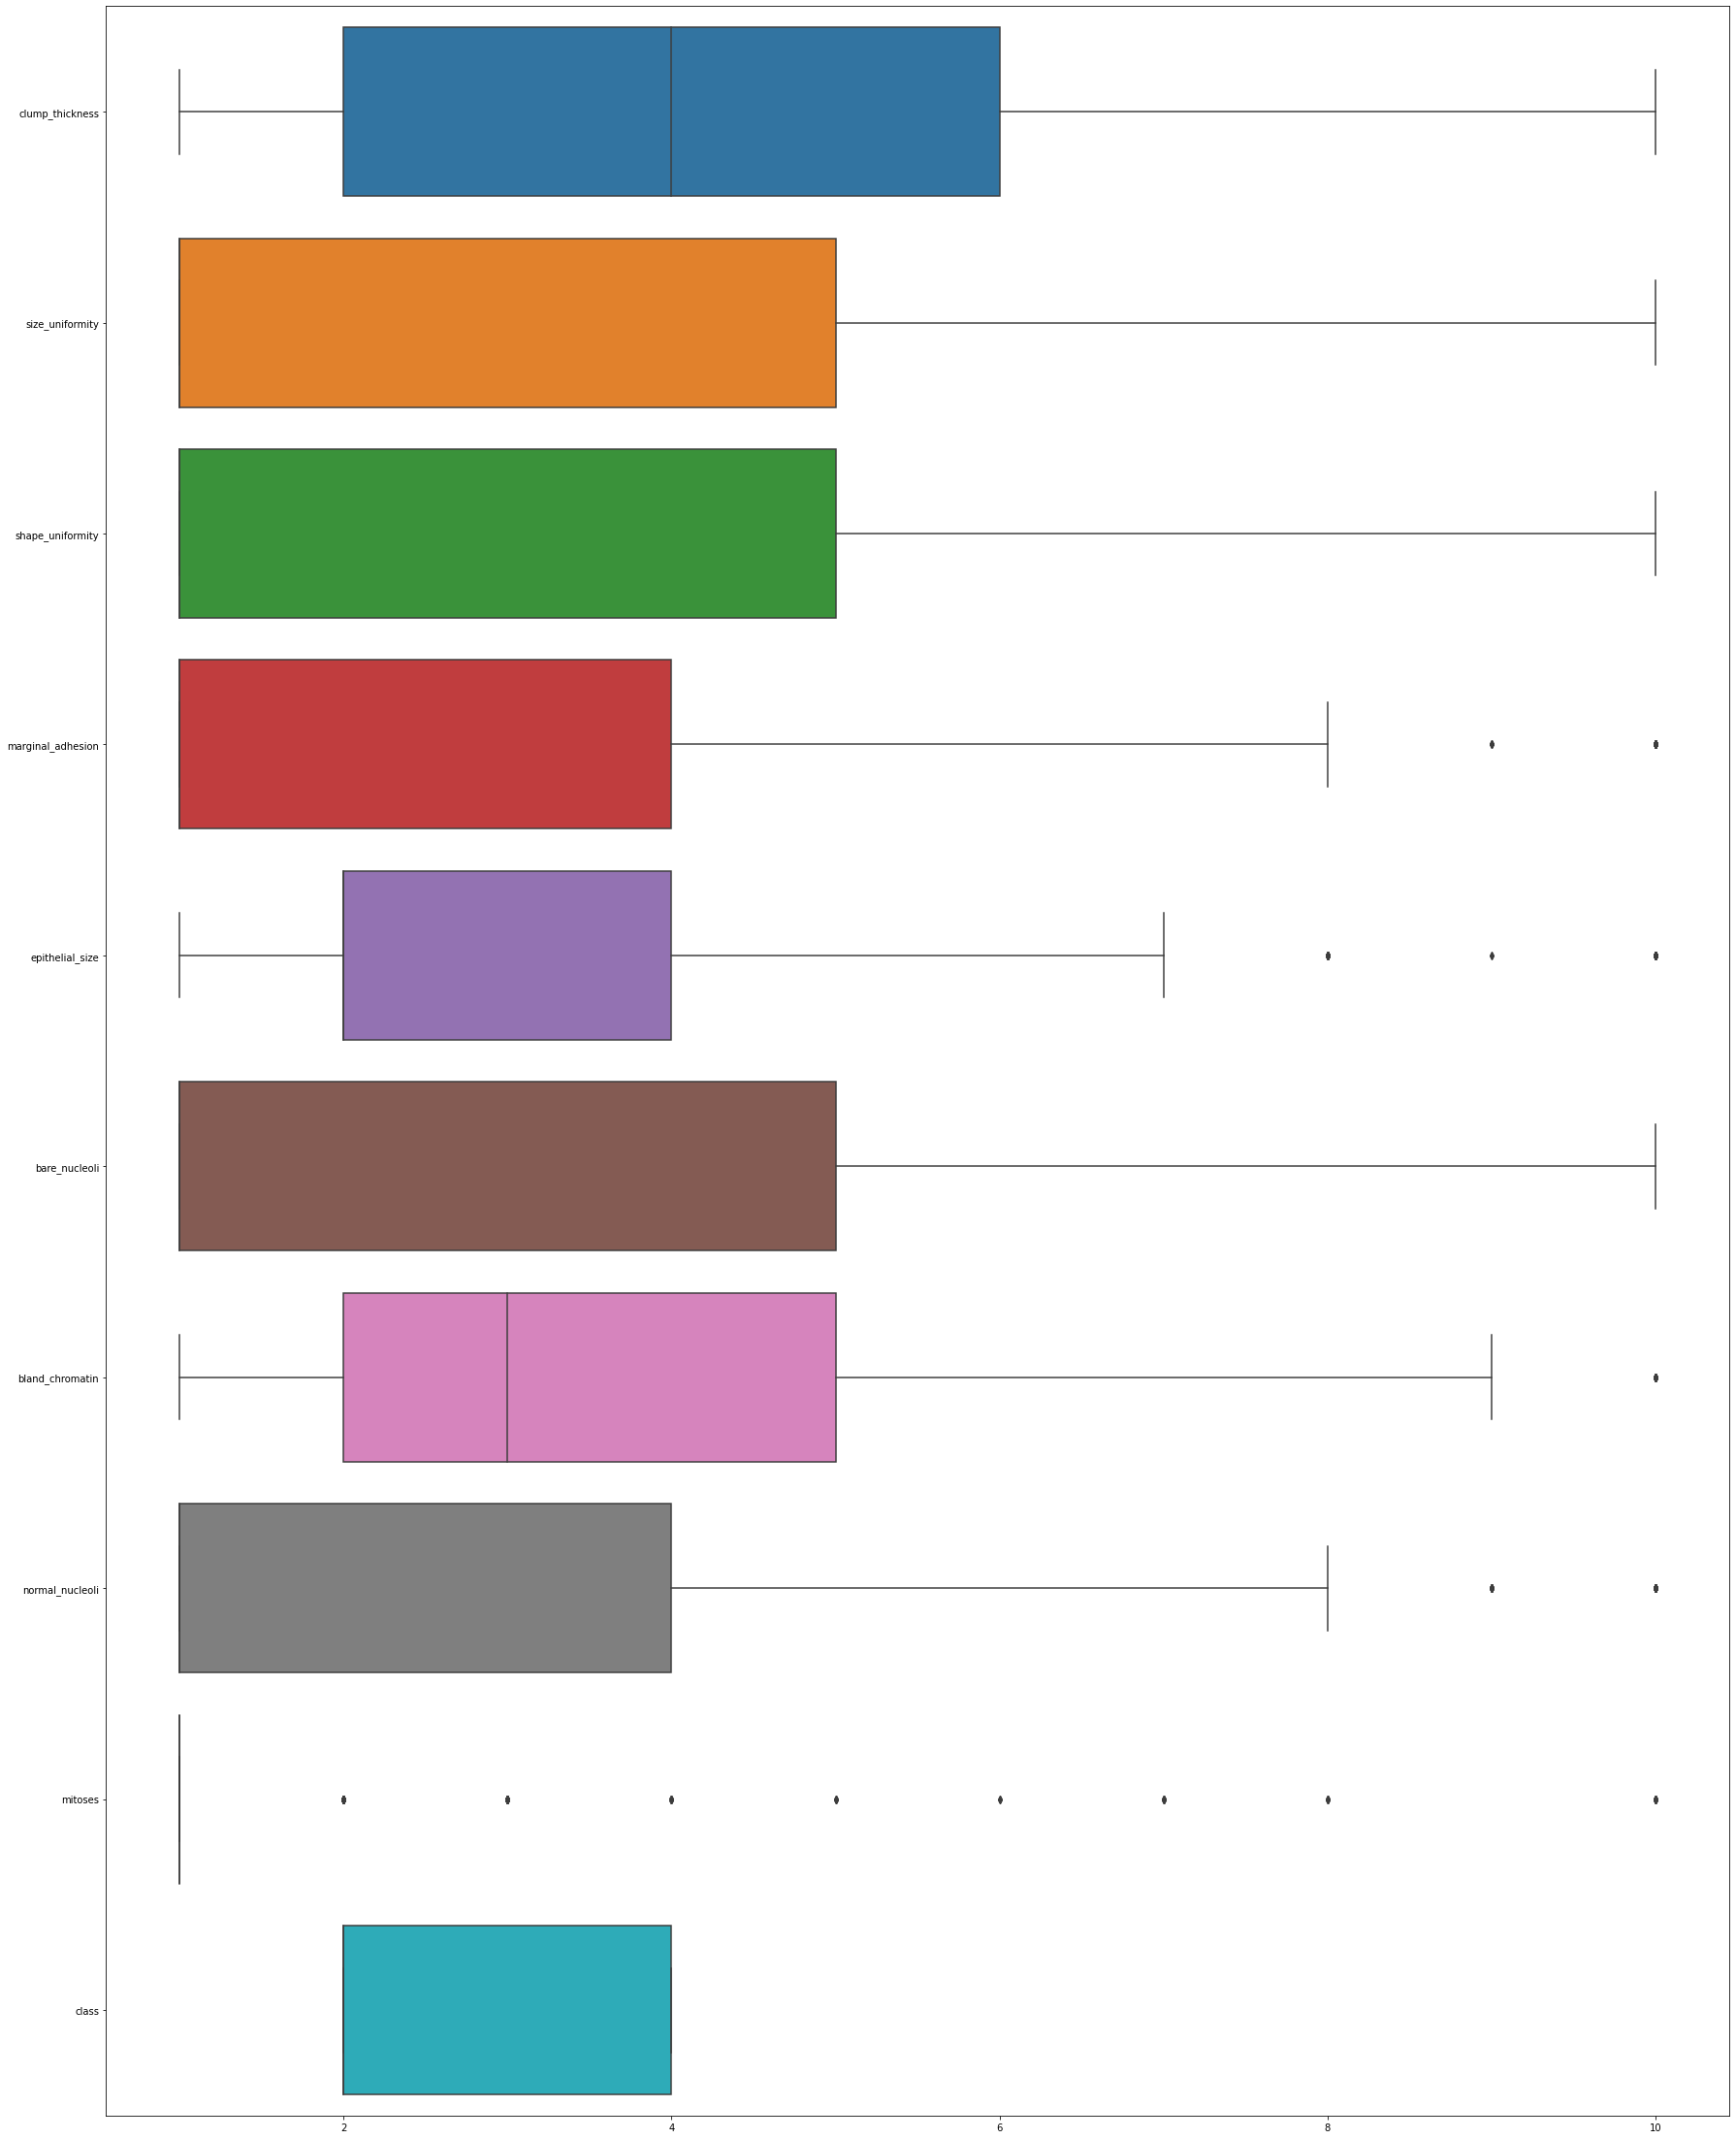

In [262]:
plt.figure(figsize=(30,40))
sns.boxplot(data=df,orient="h")

In [263]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<AxesSubplot:>

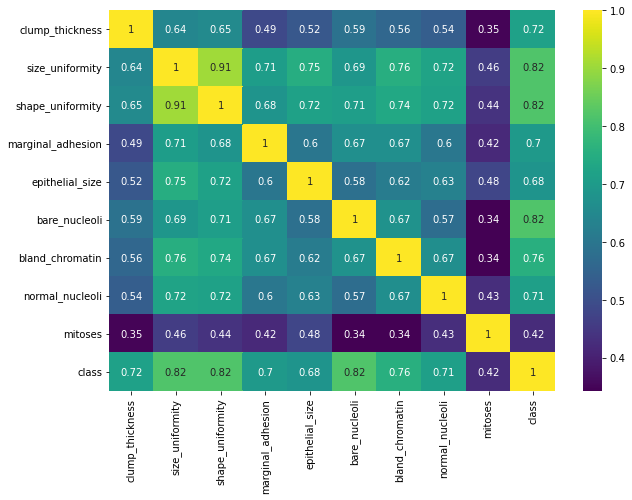

In [272]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis",vmax=1)

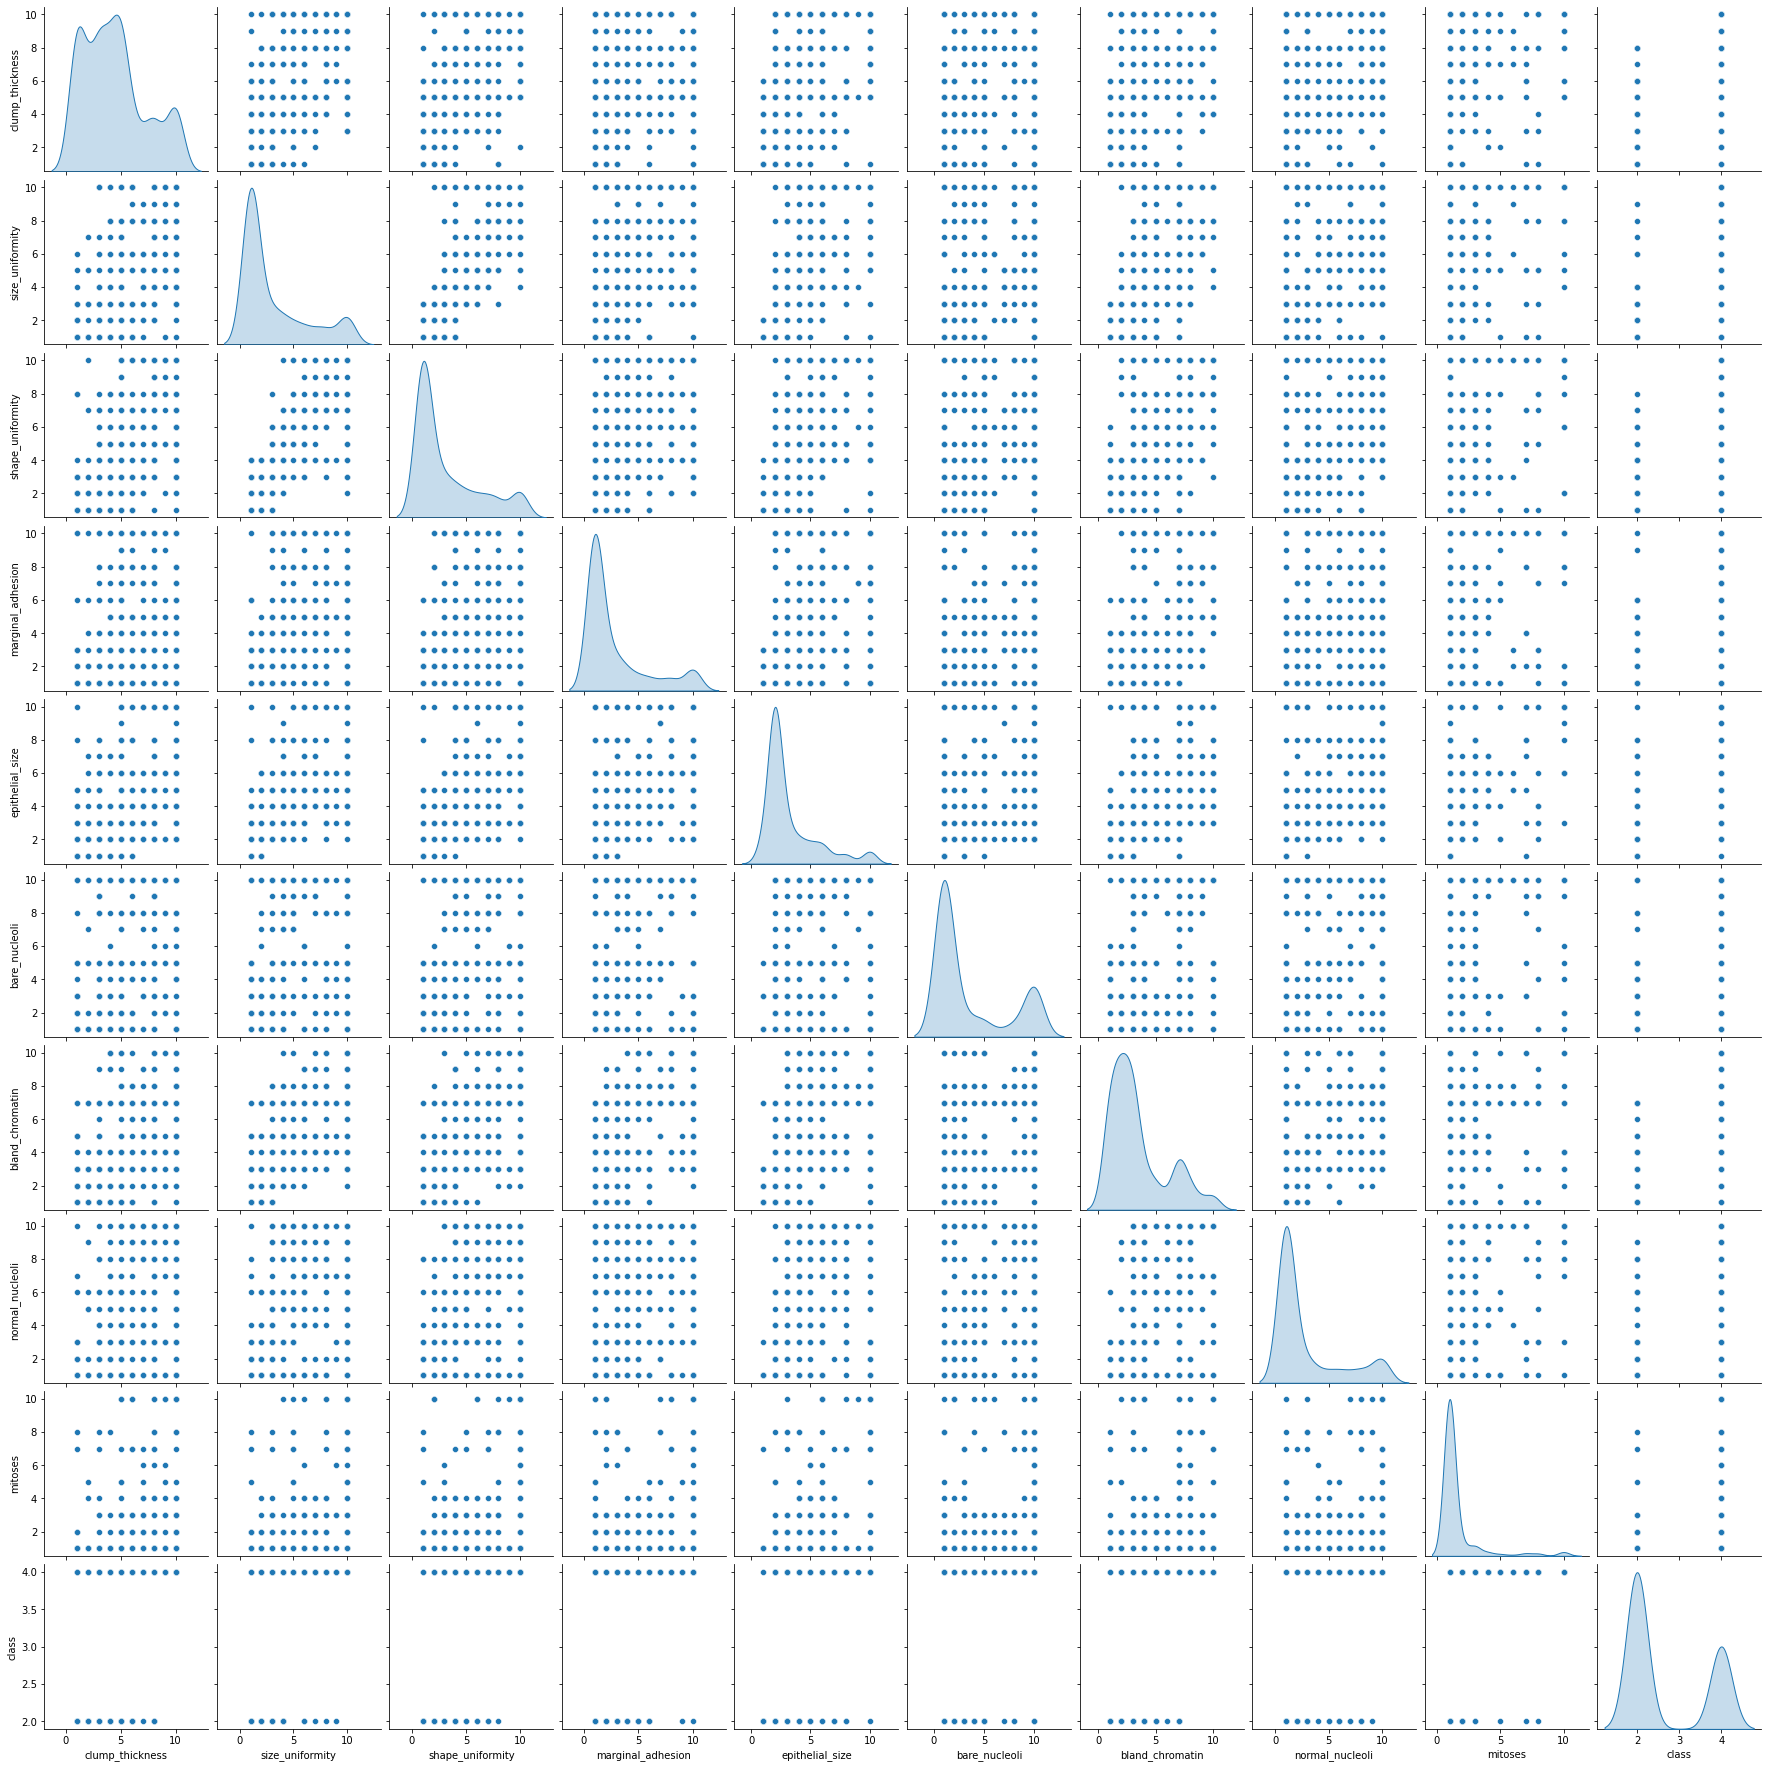

In [273]:
sns.pairplot(df,diag_kind="kde")

In [276]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
KNN = KNeighborsClassifier(n_neighbors=5,weights="distance")

In [283]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [284]:
predict = KNN.predict(X_test)

In [285]:
predict

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [288]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [296]:
KNN.score(X_test,y_test) 

0.9714285714285714

In [289]:
accuracy_score(y_test,predict)

0.9714285714285714

In [290]:
confusion_matrix(y_test,predict)

array([[136,   1],
       [  5,  68]], dtype=int64)

<AxesSubplot:>

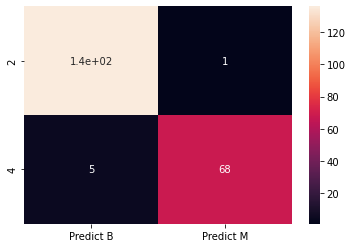

In [409]:
cm = confusion_matrix(y_test,predict,labels=[2,4])
cm_plot = pd.DataFrame(cm,index=[2,4],columns=["Predict B","Predict M"])

sns.heatmap(cm_plot,annot=True)

In [291]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [297]:
from sklearn.svm import SVC

In [341]:
support_vector_classifier = SVC(C=3,gamma=0.11)

In [342]:
support_vector_classifier.fit(X_train,y_train)

SVC(C=3, gamma=0.11)

In [343]:
pre2 = support_vector_classifier.predict(X_test)

In [344]:
support_vector_classifier.score(X_test,y_test)

0.9809523809523809

In [366]:
accuracy_score(y_test,pre2)

0.9809523809523809

In [367]:
print(classification_report(y_test,pre2))

              precision    recall  f1-score   support

           2       1.00      0.97      0.99       137
           4       0.95      1.00      0.97        73

    accuracy                           0.98       210
   macro avg       0.97      0.99      0.98       210
weighted avg       0.98      0.98      0.98       210



In [369]:
confusion_matrix(y_test,pre2)

array([[133,   4],
       [  0,  73]], dtype=int64)

<AxesSubplot:>

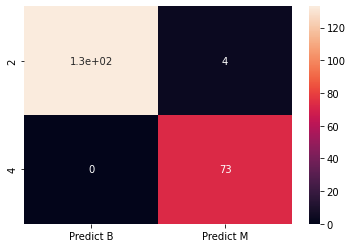

In [410]:
cm = confusion_matrix(y_test,pre2,labels=[2,4])
cm_plot = pd.DataFrame(cm,index=[2,4],columns=["Predict B","Predict M"])

sns.heatmap(cm_plot,annot=True)

In [370]:
#comparing both the prediction

In [375]:
KNN= pd.DataFrame(predict,columns=["KNN"])
SVC = pd.DataFrame(pre2,columns=["SVC"])
pd.set_option("display.max_rows",300)
prediction_comparision = pd.concat([KNN,SVC],axis=1)

In [376]:
prediction_comparision 

,KNN,SVC
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [394]:
from sklearn.metrics import plot_confusion_matrix